<a href="https://colab.research.google.com/github/Steven-A3/DeepLearningZeroToAllColab/blob/master/RL_3_FrozenLakeDet_QTable.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install gym > /dev/null 2>&1
!apt-get update > /dev/null 2>&1
!apt-get install cmake > /dev/null 2>&1
!pip install --upgrade setuptools 2>&1
!pip install ez_setup > /dev/null 2>&1
!pip install gym[atari] > /dev/null 2>&1

     |████████████████████████████████| 593kB 3.4MB/s 
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
  Found existing installation: setuptools 42.0.2
    Uninstalling setuptools-42.0.2:
      Successfully uninstalled setuptools-42.0.2


In [0]:
import gym
from gym.envs.registration import register
import numpy as np
import random
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

register(
    id='FrozenLake-v3',
    entry_point='gym.envs.toy_text:FrozenLakeEnv',
    kwargs={'map_name': '4x4',
            'is_slippery': False}
)


In [0]:
env = gym.make("FrozenLake-v3")

In [0]:
# Initialize table with all zeros
Q = np.zeros([env.observation_space.n, env.action_space.n])
# Set learning parameters
dis = .99
num_episodes = 2000

# create lists to contain total rewards and steps per episode
rList = []
for i in range(num_episodes):
    # Reset environment and get first new observation
    state = env.reset()
    rAll = 0
    done = False

    e = 1. / ((i // 100) + 1)  # Python2&3

    # The Q-Table learning algorithm
    while not done:
        # Choose an action by e greedy
        if np.random.rand(1) < e:
            action = env.action_space.sample()
        else:
            action = np.argmax(Q[state, :])

        # Get new state and reward from environment
        new_state, reward, done, _ = env.step(action)

        # Update Q-Table with new knowledge using learning rate
        Q[state, action] = reward + dis * np.max(Q[new_state, :])

        rAll += reward
        state = new_state

    rList.append(rAll)

env.close()

In [0]:
print("Success rate: " + str(sum(rList) / num_episodes))
print("Final Q-Table Values")
print("LEFT DOWN RIGHT UP")
for i in range(0,4):
    print(Q[i*4], Q[i*4+1], Q[i*4+2], Q[i*4+3])

Success rate: 0.632
Final Q-Table Values
LEFT DOWN RIGHT UP
[0.94148015 0.95099005 0.93206535 0.94148015] [0.94148015 0.         0.         0.93206535] [0. 0. 0. 0.] [0. 0. 0. 0.]
[0.95099005 0.96059601 0.         0.94148015] [0. 0. 0. 0.] [0. 0. 0. 0.] [0. 0. 0. 0.]
[0.96059601 0.         0.970299   0.95099005] [0.96059601 0.9801     0.9801     0.        ] [0.970299 0.99     0.       0.      ] [0. 0. 0. 0.]
[0. 0. 0. 0.] [0.       0.9801   0.99     0.970299] [0.9801 0.99   1.     0.9801] [0. 0. 0. 0.]


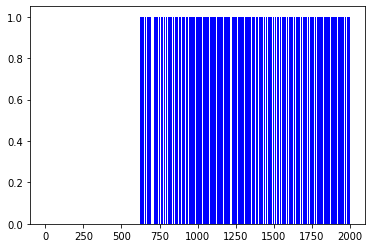

In [0]:
plt.bar(range(len(rList)), rList, color="blue")
plt.show()
